# Explore here

In [37]:
#Step 1: Loading the dataset
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
#Storing the raw data in the ./data/raw folder
data.to_csv("../data/raw/data.csv", index = False)

In [39]:
#Step 2: Performing a full EDA
#Information about data types and non-null values

data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

In conclusion:
There are a total of 41188 rows and 21 columns.
The variables do not contain null values.  
The data has 10 numerical characteristics and 11 categorical characteristics.

In [40]:
#Eliminating irrelevant information
data.drop(["day_of_week", "campaign", "pdays", "previous"], axis = 1, inplace = True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


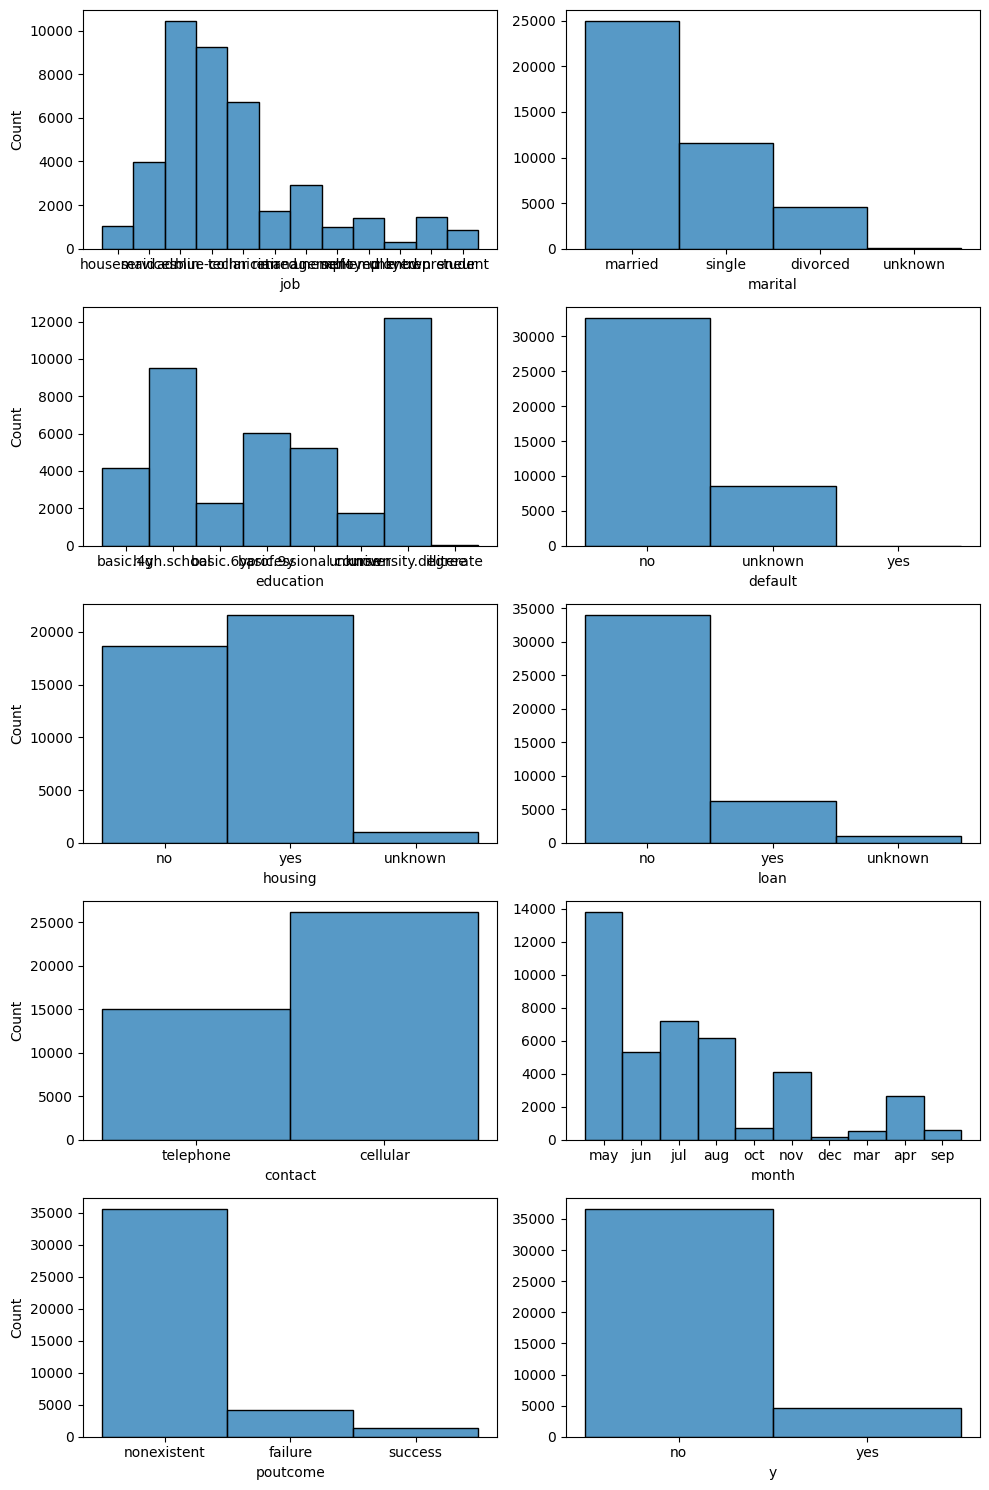

In [41]:
#Analysis of univariate (categorical) variables

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(5, 2, figsize = (10, 15))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = data, x = "job")
sns.histplot(ax = axis[0, 1], data = data, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data, x = "education")
sns.histplot(ax = axis[1, 1], data = data, x = "default").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = data, x = "housing")
sns.histplot(ax = axis[2, 1], data = data, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = data, x = "contact")
sns.histplot(ax = axis[3, 1], data = data, x = "month").set(ylabel = None)
sns.histplot(ax = axis[4, 0], data = data, x = "poutcome")
sns.histplot(ax = axis[4, 1], data = data, x = "y").set(ylabel = None)


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

From the histograms we can see that the majority of the clients are married with university degree who work as a administrative, blue-collar or technician. Most of them have a housing loan rather than personal loan or credit. The principal contact type is mobile phone. The most active marketing campaign was in may; in summer many clients were contacted as well, however, after that period there was a dicline in activity. The previous marketing campaign was not very succesfull. And only about 15% of the clients are expected to take out a long-term deposit.

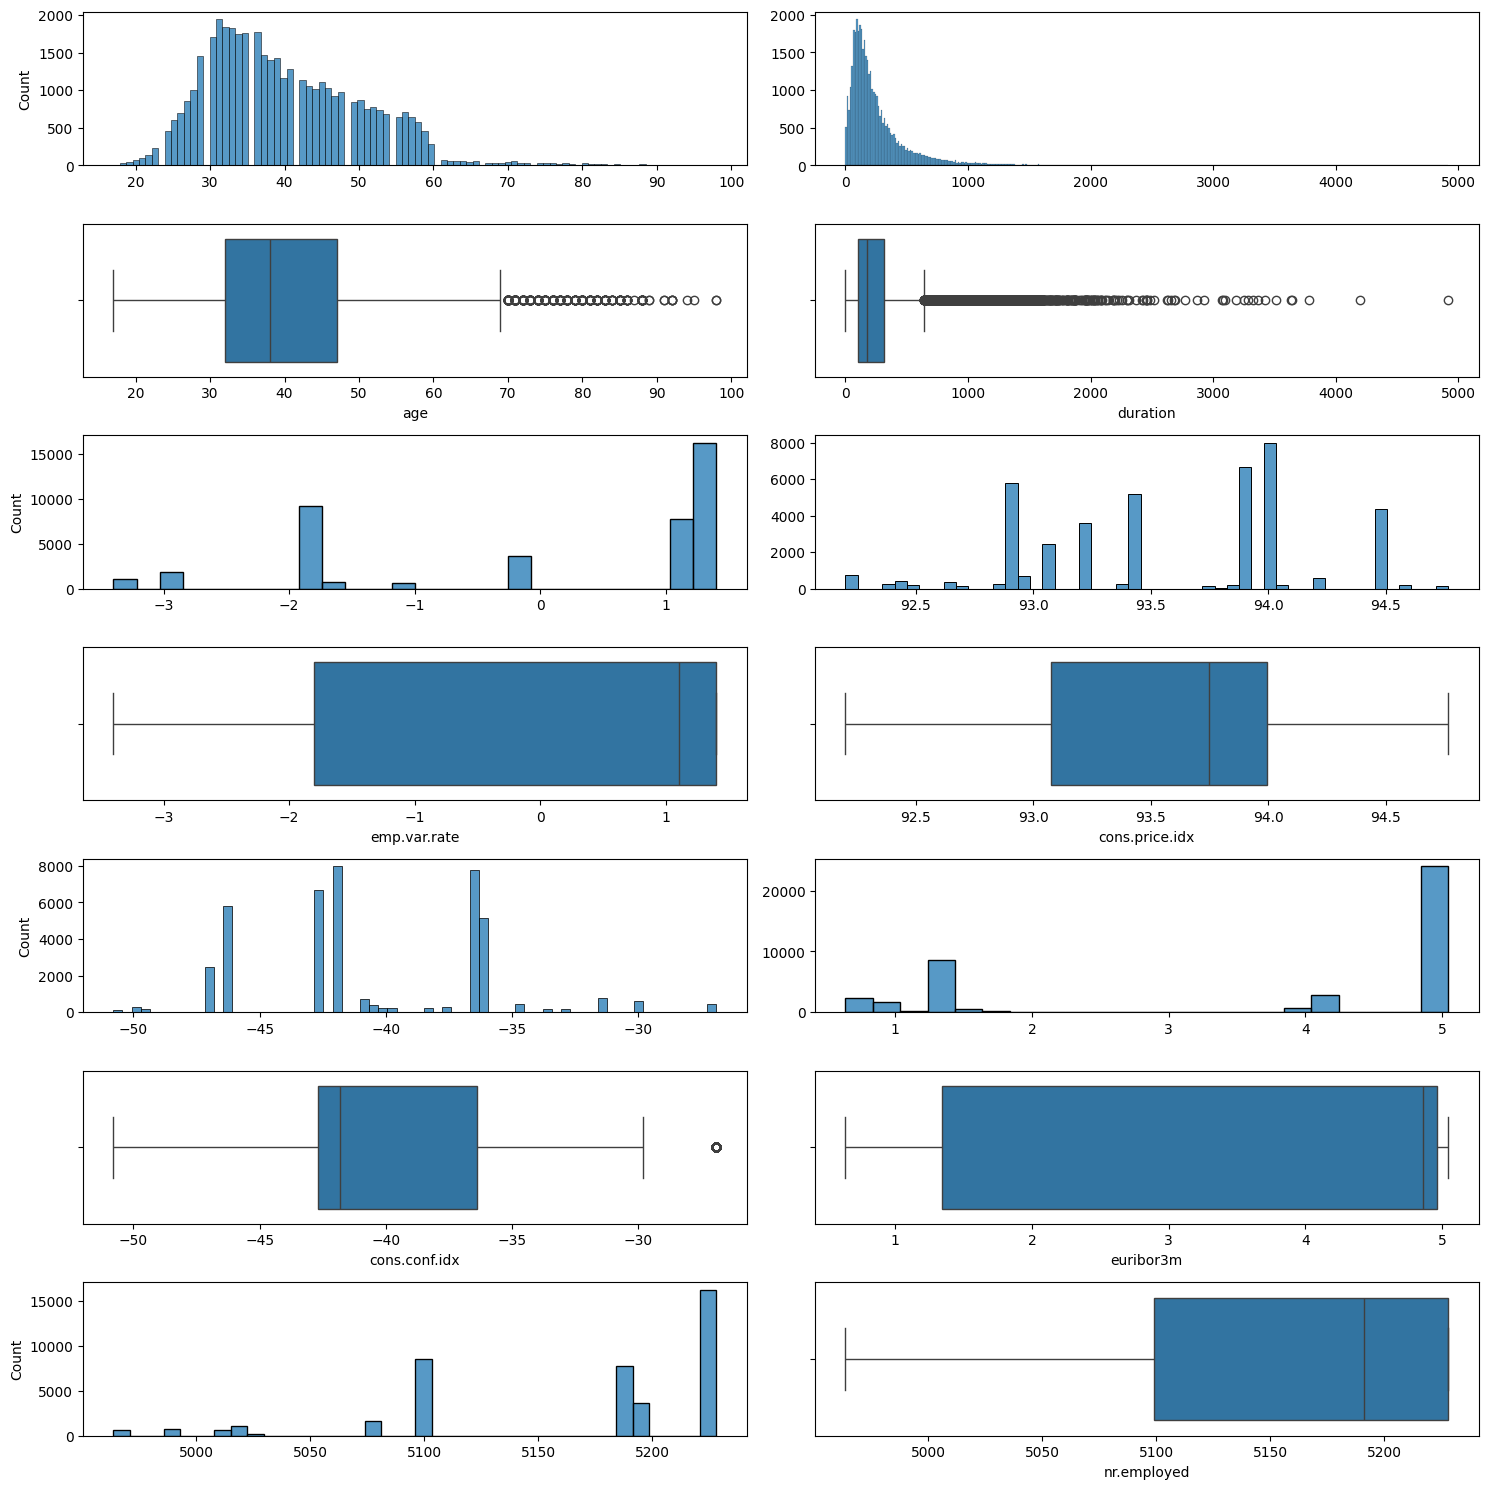

In [42]:
#Analysis on numeric variables
fig, axis = plt.subplots(7, 2, figsize = (15, 15))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "duration")
sns.histplot(ax = axis[2, 0], data = data, x = "emp.var.rate").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "emp.var.rate")
sns.histplot(ax = axis[2, 1], data = data, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "cons.price.idx")
sns.histplot(ax = axis[4, 0], data = data, x = "cons.conf.idx").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "cons.conf.idx")
sns.histplot(ax = axis[4, 1], data = data, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "euribor3m")
sns.histplot(ax = axis[6, 0], data = data, x = "nr.employed").set(xlabel = None)
sns.boxplot(ax = axis[6, 1], data = data, x = "nr.employed")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


The graphs above reveal that age and duration have outliers. We should set some upper and lower bounds to determine whether a data point should be modified, eliminated or kept.

In [43]:
# Age
age_stats = data["age"].describe()
age_stats

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [44]:
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 69.5 and 9.5, with an interquartile range of 15.0


In [45]:
data[data["age"] > 80]

,age,job,marital,education,default,housing,loan,contact,month,duration,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,48,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,266,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,796,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27808,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,96,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27810,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,126,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40950,81,retired,divorced,basic.4y,no,yes,no,cellular,oct,192,success,-1.1,94.601,-49.5,0.987,4963.6,no
40965,81,retired,divorced,basic.4y,no,yes,no,cellular,oct,158,failure,-1.1,94.601,-49.5,0.987,4963.6,no
40969,84,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,106,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,138,success,-1.1,94.601,-49.5,1.000,4963.6,no


Based on these results, the records of clients older than 70 years should be eliminated. However, it also can be seen that some of the retired take a long-term deposit, so thus, this group of clients is likely to have an impact on the target variable and it´s better to keep the outliers.

In [46]:
#Duration
duration_stats = data["duration"].describe()
duration_stats

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [47]:
duration_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * duration_iqr
lower_limit = duration_stats["25%"] - 1.5 * duration_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(duration_iqr, 2)}")

The upper and lower limits for finding outliers are 644.5 and -223.5, with an interquartile range of 217.0


In [48]:
data[data["duration"] > 4500]

,age,job,marital,education,default,housing,loan,contact,month,duration,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,4918,nonexistent,-0.1,93.2,-42.0,4.406,5195.8,no


As we can see there is only one value representing that extreme, and since the client has not been convinced to take a long term deposit, even thought, the duration of previous contact was 4918 second, this outlier can be removed from the dataset.

In [49]:
data = data.drop(index=24091)

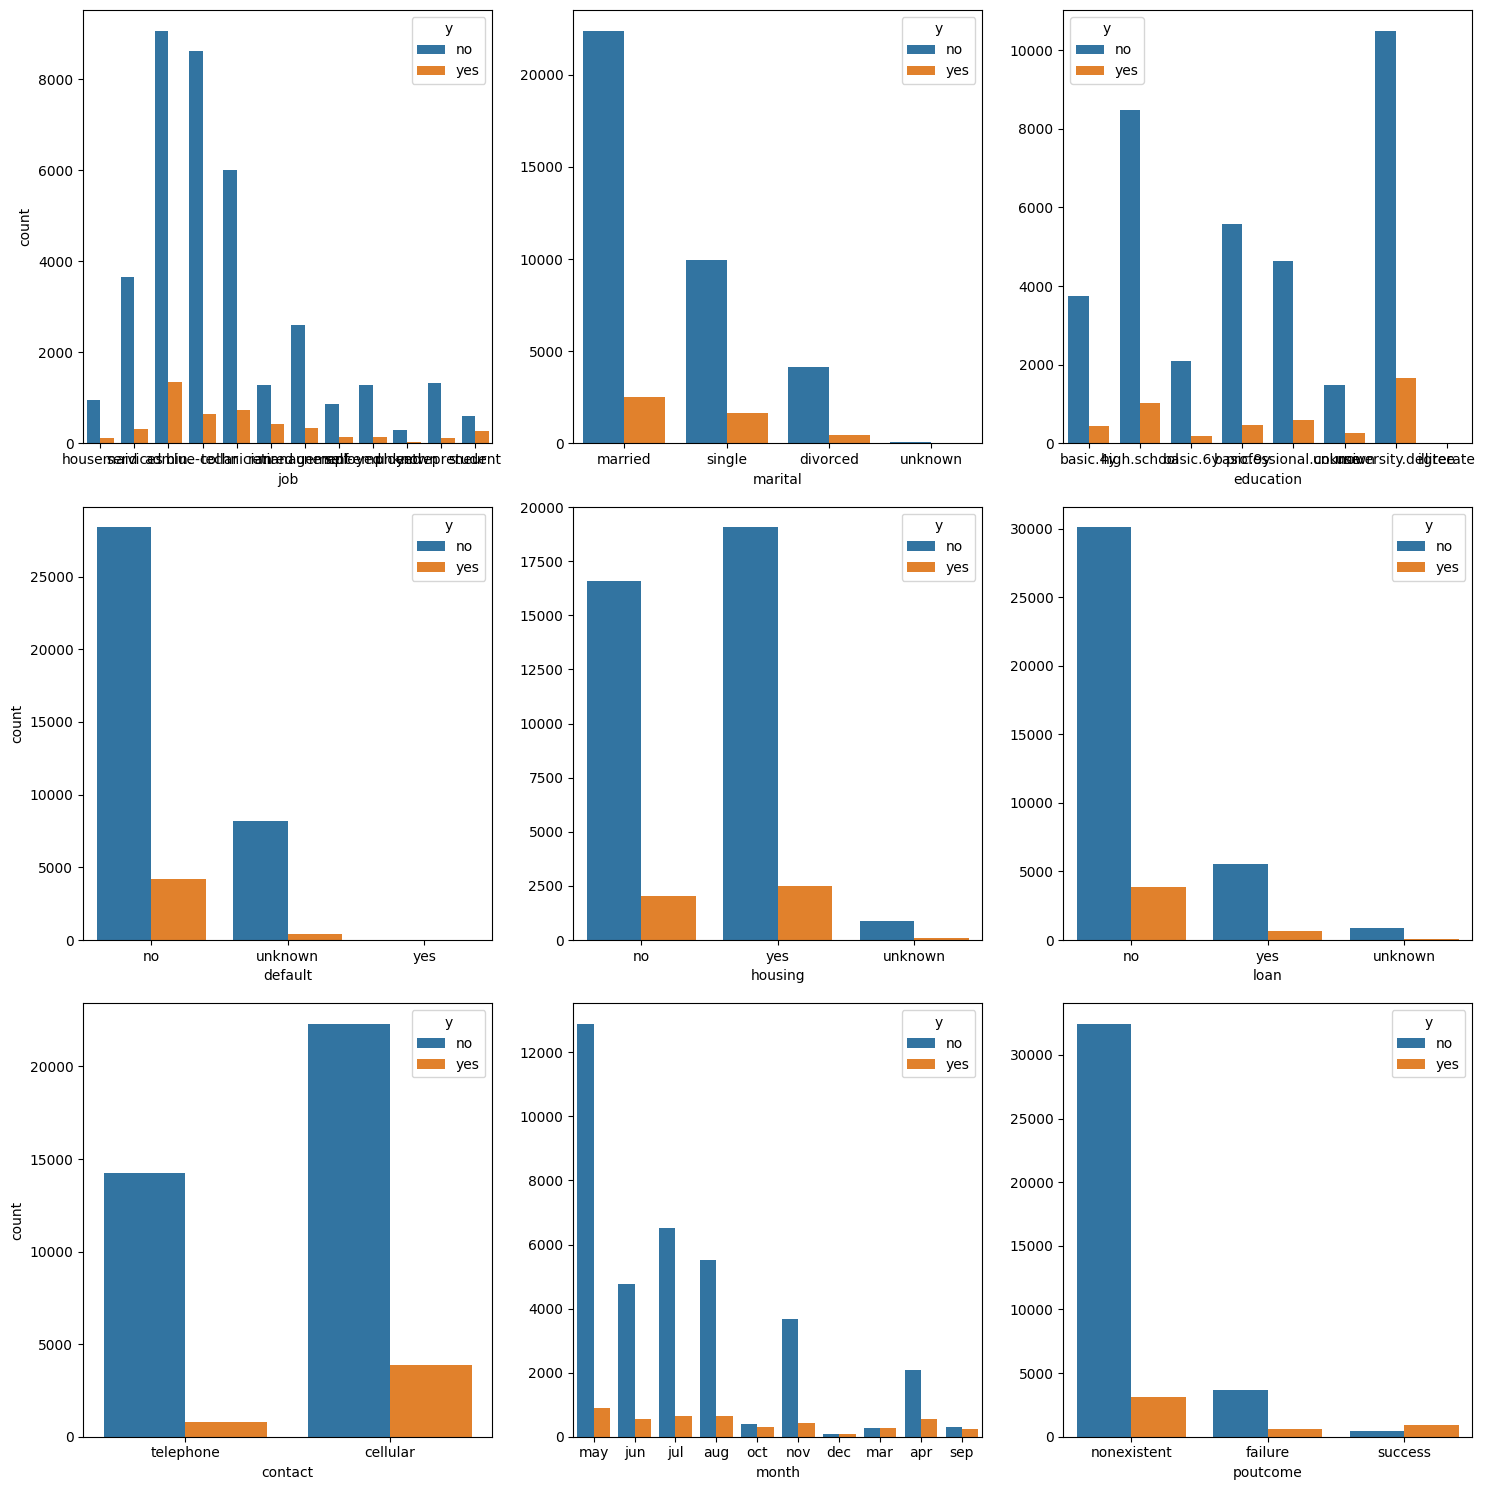

In [50]:
#Analysis of multivariate variables (categorical-categorical analysis)
fig, axis = plt.subplots(3, 3, figsize = (15, 15))

sns.countplot(ax = axis[0, 0], data = data, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = data, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = data, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = data, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = data, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = data, x = "contact", hue = "y")
sns.countplot(ax = axis[2, 1], data = data, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = data, x = "poutcome", hue = "y").set(ylabel = None)

plt.tight_layout()

plt.show()

The graphs above show that there is a high posibiity that the client takes out a long-term deposit if he/she is administrative or blue-collar, is married, has a university or at least high school degree, does not have personal loan, neither credit, and is contacted by cellular.

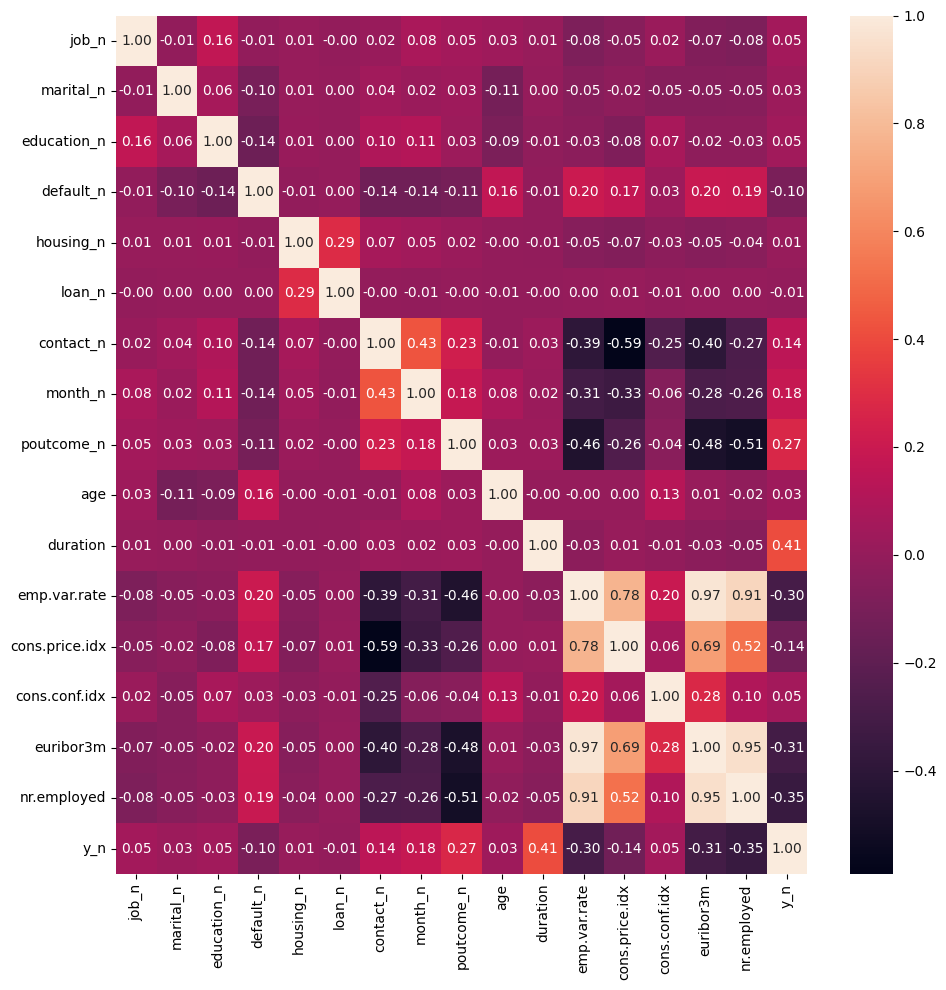

In [51]:
# Numerical-categorical analysis (complete)
# Factorizing (convert categorical values into numerical labels) values
data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["contact_n"] = pd.factorize(data["contact"])[0]
data["month_n"] = pd.factorize(data["month"])[0]
data["poutcome_n"] = pd.factorize(data["poutcome"])[0]
data["y_n"] = pd.factorize(data["y"])[0]


num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "poutcome_n",
                 "age", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(data[num_variables].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

There is a strong negative relationship between poutcome (result of the previous marketing campaign) and the indicators (euribor, consumer price index, etc.), which makes a lot of sense, the grow of interst rates and prices affect marketing activiies. On the other hand, there is a strong positive relationship between employment variation rate and the indexes. As for the target variable, the stronger correlation observed with duration (the longer the previous contact the high the posibility that the customer takes out a long-term deposit).

In [52]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,poutcome_n,age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.062158,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.493827,0.035485,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.246914,0.053822,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.035961,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.481481,0.073113,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [53]:
#Feature selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

# Dividing the dataset into training and test samples
X = data_scal.drop("y_n", axis = 1)
y = data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

#Store the intermediate data in the ./data/interim folder
#data_scal.to_csv("../data/interim/bank-marketing-campaign-data.csv", index = False)


,poutcome_n,duration,emp.var.rate,euribor3m,nr.employed
0,0.0,0.111455,1.000000,0.980503,1.000000
1,0.0,0.054060,0.000000,0.024484,0.203781
2,0.0,0.008573,0.666667,0.721378,0.804159
3,0.0,0.081924,0.937500,0.958059,0.859735
4,0.0,0.040010,0.333333,0.160961,0.512287


In [54]:
X_test_sel.head()

,poutcome_n,duration,emp.var.rate,euribor3m,nr.employed
0,0.0,0.029293,1.000000,0.982544,1.000000
1,0.0,0.038342,0.687500,0.790297,0.877883
2,0.0,0.050250,0.937500,0.957379,0.859735
3,0.0,0.003334,1.000000,0.980503,1.000000
4,0.0,0.056204,0.333333,0.183859,0.512287


In [55]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("/workspaces/Liutciia-logistic-regression/data/processed/bank-marketing-campaign-data_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Liutciia-logistic-regression/data/processed/bank-marketing-campaign-data_test.csv", index=False)

In [56]:
#Step 3: Building a logistic regression model
#Reading the processed dataset
import pandas as pd

train_data = pd.read_csv("../data/processed/bank-marketing-campaign-data_train.csv")
test_data = pd.read_csv("../data/processed/bank-marketing-campaign-data_test.csv")

train_data.head()


,poutcome_n,duration,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.111455,1.000000,0.980503,1.000000,0.0
1,0.0,0.054060,0.000000,0.024484,0.203781,0.0
2,0.0,0.008573,0.666667,0.721378,0.804159,0.0
3,0.0,0.081924,0.937500,0.958059,0.859735,0.0
4,0.0,0.040010,0.333333,0.160961,0.512287,0.0


In [57]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [58]:
#Initialization and training of the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
#Model prediction
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
#Using metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

#Accuracy score
accuracy_score(y_test, y_pred)

0.9106579266812334

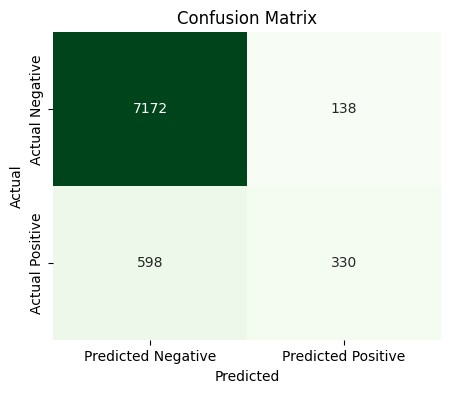

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Computing the confusion matrix
marketing_campaign = confusion_matrix(y_test, y_pred)

# Converting the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(marketing_campaign, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

# Ploting the confusion matrix
plt.figure(figsize=(5, 4)) 
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False, cmap='Greens')  # Adding a color map for better visual distinction
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The interpretation of a confusion matrix is as follows:

True positive (TP): corresponds to the number 330 and are the cases where the model predicted positive (take a deposit) and the actual class is also positive.
True negative (TN): corresponds to the number 7172 and are the cases where the model predicted negative (no take a deposit) and the actual class is also negative.
False positive (FP): corresponds to the number 138 and are the cases in which the model predicted positive, but the actual class is negative.
False negative (FN): corresponds to the number 598 and are the cases where the model predicted negative, but the actual class is positive.

In [62]:
#Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

#Conclusion: of all the samples predicted as positive, 67% were actually positive

Precision: 0.7051282051282052


In [63]:
#Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')
#Conclusion: of all the positive samples, 33% were correctly predicted as positive

Recall: 0.35560344827586204


In [64]:
#F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')
#Conclusion: A low F1 score indicates that the model is not performing well in balancing precision and recall.

F1 Score: 0.47277936962750716


In [65]:
#Step 4: Optimizing the previous model
#Grid search
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [66]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [67]:
model_grid = LogisticRegression(penalty = "l2", C = 1, solver = "lbfgs")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9106579266812334

As we can see modifying the model parameters leads to the same model performance 91% (both accuracy and grid_accuracy).

In [69]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))